In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/Product Category Classifier for ShopEase E-Commerce.csv')
df.head()

,product_id,product_name,description,brand,color,size,price,material,target_category
0,P1000,Belt,Belt with high quality features for everyday use,Samsung,Black,NaN,3258.68,Wood,Accessories
1,P1001,Belt,Belt with high quality features for everyday use,Wildcraft,Green,S,1166.15,Leather,Accessories
2,P1002,Running Shoes,Running Shoes with high quality features for e...,Nike,Green,XL,497.23,Steel,Footwear
3,P1003,Skipping Rope,Skipping Rope with high quality features for e...,Roadster,White,1.5L,1262.66,Rubber,Sports
4,P1004,Belt,Belt with high quality features for everyday use,Roadster,White,1.5L,821.96,Silicon,Accessories


In [12]:
# Combine text features
df['text'] = (
    df['product_name'].astype(str) + ' ' +
    df['description'].astype(str) + ' ' +
    df['brand'].astype(str) + ' ' +
    df['color'].astype(str) + ' ' +
    df['size'].astype(str) + ' ' +
    df['material'].astype(str)
)

# Handle missing values in text
df['text'] = df['text'].fillna('')

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['target_category'])

# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=100)

# (Optional) Scale price feature
scaler = StandardScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']])

# Final features: padded text + price
X_text = padded
X_price = df['price_scaled'].values.reshape(-1, 1)

# Concatenate text and price
X = np.hstack((X_text, X_price))
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
vocab_size = 5000
embedding_dim = 64
max_length = 100
num_classes = len(df['label'].unique())

model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,702 (84.77 KB)

 Trainable params: 21,702 (84.77 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    batch_size=32
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1947 - loss: 4.9047 - val_accuracy: 0.3400 - val_loss: 1.5616
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4097 - loss: 1.4479 - val_accuracy: 0.4450 - val_loss: 1.3294
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4620 - loss: 1.2667 - val_accuracy: 0.4600 - val_loss: 1.2762
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4884 - loss: 1.1897 - val_accuracy: 0.4750 - val_loss: 1.3471
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5499 - loss: 1.1296 - val_accuracy: 0.5350 - val_loss: 1.3597
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4645 - loss: 1.2382 - val_accuracy: 0.4950 - val_loss: 1.3006
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5202 - loss: 1.1259 - val_accuracy: 0.5200 - val_loss: 1.1590
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5266 - loss: 1.0429 - val_accuracy: 0.5250 - val_los

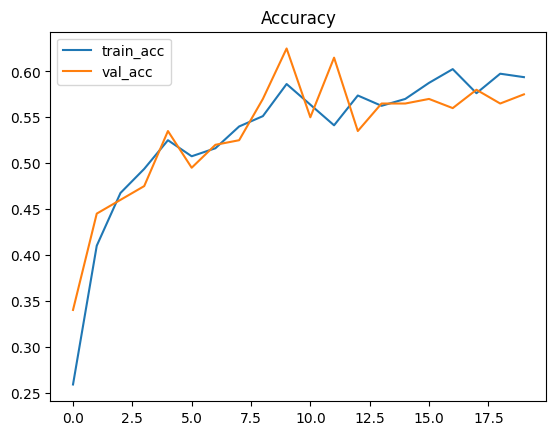

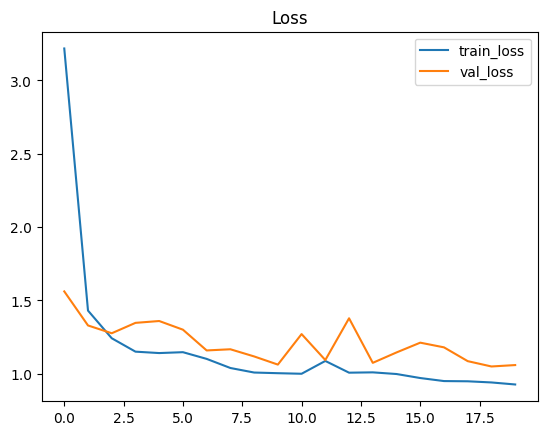

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
                 precision    recall  f1-score   support

    Accessories       0.86      0.53      0.66        36
       Clothing       0.45      0.86      0.59        35
    Electronics       0.42      0.55      0.48        31
       Footwear       0.87      0.57      0.69        35
Home Appliances       0.65      0.35      0.46        31
         Sports       0.56      0.56      0.56        32

       accuracy                           0.57       200
      macro avg       0.64      0.57      0.57       200
   weighted avg       0.64      0.57      0.58       200



In [15]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss")
plt.show()

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [16]:
sample = {
    'product_name': 'Yoga Mat',
    'description': 'High grip eco-friendly mat',
    'brand': 'Wildcraft',
    'color': 'Blue',
    'size': 'L',
    'material': 'Foam',
    'price': 999.0
}

sample_text = (
    sample['product_name'] + ' ' +
    sample['description'] + ' ' +
    sample['brand'] + ' ' +
    sample['color'] + ' ' +
    sample['size'] + ' ' +
    sample['material']
)

seq = tokenizer.texts_to_sequences([sample_text])
pad = pad_sequences(seq, maxlen=100)
price_scaled = scaler.transform([[sample['price']]])
sample_input = np.hstack((pad, price_scaled))

pred_class = np.argmax(model.predict(sample_input), axis=1)
print(f"Predicted category: {le.inverse_transform(pred_class)[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted category: Accessories
